# Devoir Deep Learning

# @@@@@ spam email TASK  @@@@@

## import librairies

In [313]:
import numpy as np 
import pandas as pd 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier    
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

## load data

In [314]:
spam = pd.read_csv("spam.csv")

# Display the dataframe
spam

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


Nos données comprennent 4601 e-mails (lignes) et 57 caractéristiques (colonnes). Ses caractéristiques sont caractérisées comme suit :

**word_freq_address** - pourcentage de mots dans l'e-mail qui correspondent à ADDRESS.

**char_freq_#** - pourcentage de caractères dans l'e-mail qui correspondent au symbole '#'.

**capital_run_length_average** - longueur moyenne des séquences ininterrompues de lettres capitales.

**capital_run_length_longest** - longueur de la plus longue séquence ininterrompue de lettres capitales.

**capital_run_length_total** - nombre total de lettres capitales dans l'e-mail.


la fonction "new_data_correlation" me permet de generer une nouvelle table analytique, qui ne contient que les variables dont la corrélation avec la target  dépasse un seuil, que je détermine.
Dans ce cas, j'ai fixé mon seuil à 15% de corrélation avec ma variable sible.

In [315]:
#Correlation Matrix
def new_data_correlation(data, s):
    A = data.corr()
    correlation_table = pd.DataFrame(A["spam"]).reset_index()
    selected_columns = correlation_table[abs(correlation_table["spam"]) >= s]
    return data[selected_columns["index"].tolist()]

In [316]:
new_spam = new_data_correlation(spam, 0.15)
new_spam

,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_receive,word_freq_addresses,word_freq_free,word_freq_business,...,word_freq_hpl,word_freq_george,word_freq_650,word_freq_labs,word_freq_1999,char_freq_exclaim,char_freq_dollar,capital_run_length_longest,capital_run_length_total,spam
0,0.64,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,...,0.0,0.0,0.0,0.0,0.00,0.778,0.000,61,278,1
1,0.50,0.14,0.28,0.21,0.07,0.00,0.21,0.14,0.14,0.07,...,0.0,0.0,0.0,0.0,0.07,0.372,0.180,101,1028,1
2,0.71,1.23,0.19,0.19,0.12,0.64,0.38,1.75,0.06,0.06,...,0.0,0.0,0.0,0.0,0.00,0.276,0.184,485,2259,1
3,0.00,0.63,0.00,0.31,0.63,0.31,0.31,0.00,0.31,0.00,...,0.0,0.0,0.0,0.0,0.00,0.137,0.000,40,191,1
4,0.00,0.63,0.00,0.31,0.63,0.31,0.31,0.00,0.31,0.00,...,0.0,0.0,0.0,0.0,0.00,0.135,0.000,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.62,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.000,0.000,3,88,0
4597,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.353,0.000,4,14,0
4598,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.000,0.000,6,118,0
4599,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.000,0.000,5,78,0


L'application de la fonction new_data_correlation avec le seuil de 15% m'a permis d'eliminer 11 variables.
Et donc ma nouvelle table analytique comporte 27 colonnes.

Les données comportent 1 variable catégorielle et 56 variables continues.    
Les données ne comportent pas de valeurs manquantes.

## split data and create target

In [317]:
# Diviser le jeu de données en deux parties : formation (75%) et test (25%).
spam_train, spam_test = split(new_spam, train_size = 0.75, random_state = 1313) 
spam_train.head()

,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_receive,word_freq_addresses,word_freq_free,word_freq_business,...,word_freq_hpl,word_freq_george,word_freq_650,word_freq_labs,word_freq_1999,char_freq_exclaim,char_freq_dollar,capital_run_length_longest,capital_run_length_total,spam
160,0.0,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.43,0.0,...,0.21,0.00,0.00,0.00,0.00,0.146,0.146,99,642,1
2757,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,3.52,0.96,0.96,0.32,0.32,0.052,0.000,15,192,0
1668,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.000,0.000,152,292,1
589,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.000,0.000,15,36,1
4325,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.109,0.054,18,136,0


In [318]:
# Creer les matrices X et y (matrice des variables et vecteur target, pour l etrain et le test)
X_train = spam_train.drop(['spam'], axis = 1)
y_train = spam_train['spam']

X_test = spam_test.drop(['spam'], axis = 1)
y_test = spam_test['spam']

## KNN classification

KNN (K-Nearest Neighbors) est simple à comprendre et à implémenter et peut fournir des résultats satisfaisants dans de nombreuses applications. Le modèle fonctionne en trouvant les k plus proches voisins d'un nouvel email dans l'ensemble de données d'entraînement et en déterminant la classe la plus fréquente parmi eux pour classer le nouvel email.
Cette méthode peut être efficace pour la détection de spam dans les emails car les emails de spam peuvent souvent être groupés ensemble basés sur des similarités telles que des mots clés spécifiques ou des modèles de langage.

In [319]:
# Create KNN Classifier model
# je teste avec un k = 5 dans ce cas 
k = 5
spam_clf = KNeighborsClassifier(n_neighbors = k)

# Train the model 
spam_clf.fit(X_train, y_train)

print(spam_clf.score(X_train, y_train))

0.8608695652173913


c:\Users\21261\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Evaluation du Modele

In [320]:
# Confusion matrix
cm = confusion_matrix(y_true = y_train, y_pred = spam_clf.predict(X_train))

print(pd.DataFrame(cm, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print(classification_report(y_true = y_train, y_pred = spam_clf.predict(X_train))) 

c:\Users\21261\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


          Not-spam  Spam
Not-spam      1887   214
Spam           266  1083
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2101
           1       0.84      0.80      0.82      1349

    accuracy                           0.86      3450
   macro avg       0.86      0.85      0.85      3450
weighted avg       0.86      0.86      0.86      3450



c:\Users\21261\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


La fonction classification_report de scikit-learn est un outil utile pour évaluer les performances d'un modèle de classification en calculant plusieurs métriques clés. 
Cela inclut la précision, le rappel, la F1-score et le support pour chaque classe. Cela permet de comprendre les forces et les faiblesses du modèle en termes de prédiction pour chaque classe et donne une vue d'ensemble de ses performances globales.

### Validation Model

In [321]:
# Confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = spam_clf.predict(X_test))

print(pd.DataFrame(cm, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print(classification_report(y_true = y_test, y_pred = spam_clf.predict(X_test)))

          Not-spam  Spam
Not-spam       594    93
Spam           151   313
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       687
           1       0.77      0.67      0.72       464

    accuracy                           0.79      1151
   macro avg       0.78      0.77      0.77      1151
weighted avg       0.79      0.79      0.79      1151



c:\Users\21261\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\21261\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

### Cosine Distance
Dans cette section, je vais essayer de calculer les similaritées avec la fonction cosinuse, pour pouveoir comparer l'impact des distances utilisées.

In [322]:
k = 5
spam_clf = KNeighborsClassifier(n_neighbors = k, metric = 'cosine')#, algorithm = 'brute')

# Fit the model using the training set
spam_clf.fit(X_train, y_train) 
print(spam_clf.score(X_train, y_train) ) 

0.8730434782608696


c:\Users\21261\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Evaluation Model

In [323]:
# Confusion matrix
cm = confusion_matrix(y_true = y_train, y_pred = spam_clf.predict(X_train))
 
print(pd.DataFrame(cm, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print(classification_report(y_true = y_train, y_pred = spam_clf.predict(X_train)))

c:\Users\21261\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


          Not-spam  Spam
Not-spam      1858   243
Spam           195  1154
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2101
           1       0.83      0.86      0.84      1349

    accuracy                           0.87      3450
   macro avg       0.87      0.87      0.87      3450
weighted avg       0.87      0.87      0.87      3450



c:\Users\21261\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Validation Model

In [324]:
# Confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = spam_clf.predict(X_test))

print(pd.DataFrame(cm, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam'])) 
print(classification_report(y_true = y_test, y_pred = spam_clf.predict(X_test)))

          Not-spam  Spam
Not-spam       553   134
Spam           111   353
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       687
           1       0.72      0.76      0.74       464

    accuracy                           0.79      1151
   macro avg       0.78      0.78      0.78      1151
weighted avg       0.79      0.79      0.79      1151



c:\Users\21261\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\21261\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## logistic regression

POURQUOI choisir LA REGRESSION LOGISTIQUE ?

Simplicité: La régression logistique est un modèle statistique simple et facile à comprendre et à implémenter.

Interprétabilité: Les coefficients de la régression logistique peuvent être interprétés comme les odds ratios associés à chaque caractéristique indépendante.

Capacité à gérer les caractéristiques continues et catégoriques: La régression logistique peut gérer aussi bien les variables continues que les variables catégoriques.

Le score peut varier en fonction de l'échantillonnage de différents ensembles de formation.

Ainsi, un meilleur prédicteur pour le score du test sera d'ajuster le modèle plusieurs fois, ce qui est fait avec le mécanisme de validation croisée.

In [325]:
# Create Logistic Regression Classifier model
spam_clf = LogisticRegression(solver = 'liblinear', max_iter = 12000)

# Fit the model using the training set
spam_clf.fit(X_train, y_train)

print(spam_clf.score(X_train, y_train)) 

0.9118840579710145


#### cross validation

In [326]:
k = 10
scores = cross_val_score(spam_clf, X_train, y_train, cv = k)

print('\033[1m Scores: \033[0m' + (k * '{:.3f} ').format(*scores))
print('\033[1m Average: \033[0m', scores.mean())

 Scores: 0.904 0.893 0.919 0.901 0.925 0.904 0.901 0.904 0.939 0.901 
 Average:  0.9092753623188405


## Grid Search

Un grid search est intéressant pour une classification binaire avec une régression logistique car cela permet de trouver les meilleurs hyperparamètres pour un modèle de régression logistique. 

La méthode de grid search consiste à définir une grille de valeurs pour les hyperparamètres du modèle et à évaluer les performances du modèle pour chaque combinaison d'hyperparamètres. Ainsi, le grid search peut aider à trouver les hyperparamètres qui donnent les meilleures performances de classification, en minimisant les erreurs d'entraînement et de validation. 

Cela peut entraîner une amélioration significative de la performance du modèle par rapport à un choix aléatoire ou manuel des hyperparamètres.

In [327]:
# Explore the hyperparameters by calling the get_params() method
spam_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 12000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [328]:
# Create Grid Search
clf_gs = GridSearchCV(spam_clf, param_grid = {'C': [0.01, 0.1, 1, 10, 100], 
                                           'fit_intercept': [True, False]},
                                           cv = 2)
# Fit the model using the training set
clf_gs.fit(X_train, y_train)

print('\033[1m Best model: \033[0m', clf_gs.best_estimator_)
print('\033[1m Best parameters: \033[0m', clf_gs.best_params_)
print('\033[1m Best score: \033[0m', clf_gs.best_score_)

 Best model:  LogisticRegression(C=1, max_iter=12000, solver='liblinear')
 Best parameters:  {'C': 1, 'fit_intercept': True}
 Best score:  0.9098550724637682


## Ensemble methods

*  **Avergaring methods:**
    *    Voting
    *    Bagging
        
        
*  **Boosting methods:**
    *    AdaBoost
    *    Gradient boosting

## Voting

Les méthodes de vote en classification binaire permettent de combiner les résultats de plusieurs classificateurs pour obtenir une classification finale.
 
Elles peuvent améliorer la précision et la stabilité des résultats en minimisant les erreurs individuelles de chaque classificateur.

In [329]:
# Considérons 3 classifieurs différents : Régression logistique, arbre de décision, machine à vecteur de support.
clf1 = LogisticRegression(solver='liblinear')
clf2 = DecisionTreeClassifier(max_depth = 5)
clf3 = SVC()

classifiers = [('LR', clf1), ('DT', clf2), ('SVM', clf3)]

results = y_train.to_frame()
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    results[clf_name] = clf.predict(X_train)
    print('\033[1m {:3} Classifier: \033[0m \n \
        \ttrain accuracy: {:.2f}\n \
        \ttest accuracy: {:.2f}'\
         .format(clf_name,
                 clf.score(X_train, y_train),
                 clf.score(X_test, y_test)))

 LR  Classifier:  
         	train accuracy: 0.91
         	test accuracy: 0.90
 DT  Classifier:  
         	train accuracy: 0.92
         	test accuracy: 0.90
 SVM Classifier:  
         	train accuracy: 0.72
         	test accuracy: 0.71


In [330]:
# Create Voting Classifier model
# dans cette section, je cree mon modele de classification basé sur le vote
clf_voting = VotingClassifier(estimators = classifiers, voting = 'hard')
clf_voting.fit(X_train, y_train)

print('\033[1m {:3} Classifier: \033[0m \n \
        \ttrain accuracy: {:.2f}\n \
        \ttest accuracy: {:.2f}'\
         .format('Voting',
                 clf_voting.score(X_train, y_train),
                 clf_voting.score(X_test, y_test)))

 Voting Classifier:  
         	train accuracy: 0.91
         	test accuracy: 0.89


## Bagging (Bootstrap Aggregation)

La méthode de Bagging (agrégation par bootstrap) peut être utilisée dans la classification binaire pour réduire la variance dans les résultats des modèles en générant plusieurs modèles de formation différents à partir d'échantillons bootstrappés de l'ensemble de données d'origine.

### Decision Tree as a base model

In [331]:
# Create Decision Tree Classifier as a base model
clf_base = DecisionTreeClassifier(max_depth = 5)

# Create Bagging Classifier model
clf_bagging = BaggingClassifier(base_estimator = clf_base, n_estimators = 250)

# Fit the model using the training set
clf_bagging.fit(X_train, y_train)

print('\033[1m {:3} Classifier: \033[0m \n \
    \ttrain accuracy: {:.2f}\n \
    \ttest accuracy: {:.2f}'\
     .format('DT Bagging',
             clf_bagging.score(X_train, y_train),
             clf_bagging.score(X_test, y_test)))

 DT Bagging Classifier:  
     	train accuracy: 0.94
     	test accuracy: 0.92


### Logistic Regression as a base model

In [332]:
# Create Logistic Regression as a base model
clf_base = LogisticRegression(solver = 'liblinear', max_iter = 12000)

# Create Bagging Classifier model
clf_bagging = BaggingClassifier(base_estimator = clf_base,
                                n_estimators = 200)

# Fit the model using the training set
clf_bagging.fit(X_train, y_train)

print('\033[1m {:3} Classifier: \033[0m \n \
    \ttrain accuracy: {:.2f}\n \
    \ttest accuracy: {:.2f}'\
     .format('LR Bagging',
             clf_bagging.score(X_train, y_train),
             clf_bagging.score(X_test, y_test)))

 LR Bagging Classifier:  
     	train accuracy: 0.92
     	test accuracy: 0.90


## AdaBoost

In [333]:
# Create Decision Tree Classifier
clf_base = DecisionTreeClassifier(max_depth = 5)

# Create AdaBoost Classifier method
clf_adaboost = AdaBoostClassifier(base_estimator = clf_base,
                                  n_estimators = 250,
                                  learning_rate = 0.05)

# Fit the model using the training set
clf_adaboost.fit(X_train, y_train)

print('\033[1m {:3} Classifier: \033[0m \n \
    \ttrain accuracy: {:.2f}\n \
    \ttest accuracy: {:.2f}'\
     .format('DT ADA Boosting',
             clf_adaboost.score(X_train, y_train),
             clf_adaboost.score(X_test, y_test)))

 DT ADA Boosting Classifier:  
     	train accuracy: 1.00
     	test accuracy: 0.94


## Gradient Boosting

In [334]:
# Create Gradient Boosting Classifier
clf_GB = GradientBoostingClassifier(max_depth = 5,
                                    n_estimators = 250,
                                    learning_rate = 0.05)

# Fit the model using the training set
clf_GB.fit(X_train, y_train)

print('\033[1m {:3} Classifier: \033[0m \n \
    \ttrain accuracy: {:.2f}\n \
    \ttest accuracy: {:.2f}'\
     .format('DT Gradient Boosting',
             clf_GB.score(X_train, y_train),
             clf_GB.score(X_test, y_test)))

 DT Gradient Boosting Classifier:  
     	train accuracy: 0.98
     	test accuracy: 0.94


Pour cette approche de machine learning, en testant l'accuracy sur le test set, on conclus que les modeles de boosting, à savoir adaBoost et gradientBoosting performent assez bien, avec une accuracy sur le train set de 94%

# Deep Learning Approach

## Binary Classification with Neural Networks

### https://www.atmosera.com/blog/binary-classification-with-neural-networks/

Etant la premiere partie de ce notebook est bien commentée, j'essayrai d'allez un peu plus vite dans cette deuxième partie.

In [335]:
# importation des librairies
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Pour l'approche de deeplearning, je vais commencer par une architecture de réseau de neurones assez simple, avecc deux couches dances.

In [336]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=26))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 128)               3456      
                                                                 
 dense_87 (Dense)            (None, 1)                 129       
                                                                 
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


In [337]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=5)

Epoch 1/30
690/690 [==============================] - 1s 1ms/step - loss: 1.0622 - accuracy: 0.7742 - val_loss: 0.4770 - val_accuracy: 0.8532
Epoch 2/30
690/690 [==============================] - 1s 1ms/step - loss: 1.1222 - accuracy: 0.8441 - val_loss: 0.5879 - val_accuracy: 0.8488
Epoch 3/30
690/690 [==============================] - 1s 1ms/step - loss: 1.2040 - accuracy: 0.8438 - val_loss: 0.3388 - val_accuracy: 0.8862
Epoch 4/30
690/690 [==============================] - 1s 1ms/step - loss: 0.7215 - accuracy: 0.8745 - val_loss: 0.3232 - val_accuracy: 0.8957
Epoch 5/30
690/690 [==============================] - 1s 1ms/step - loss: 1.0536 - accuracy: 0.8525 - val_loss: 0.4863 - val_accuracy: 0.8888
Epoch 6/30
690/690 [==============================] - 1s 1ms/step - loss: 1.2903 - accuracy: 0.8641 - val_loss: 0.3610 - val_accuracy: 0.8975
Epoch 7/30
690/690 [==============================] - 1s 1ms/step - loss: 0.7291 - accuracy: 0.8864 - val_loss: 0.2802 - val_accuracy: 0.9131
Epoch 

le code de cette nous permet de visualiser l'accuracy sur le training set et le test set durant l'entrainement de notre modele.

[]

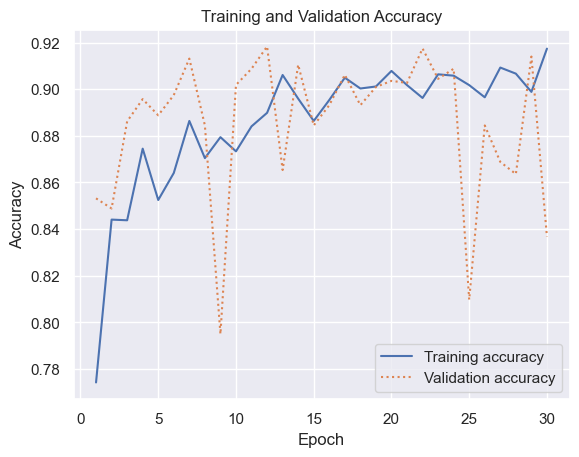

In [338]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Pour visualiser les résultats de ma prédiction, j'utilise la matrice de corrélation pour voir les faux/vrais positifs et les faux/vrais négatifs 

36/36 [==============================] - 0s 659us/step


Text(110.44999999999997, 0.5, 'Actual label')

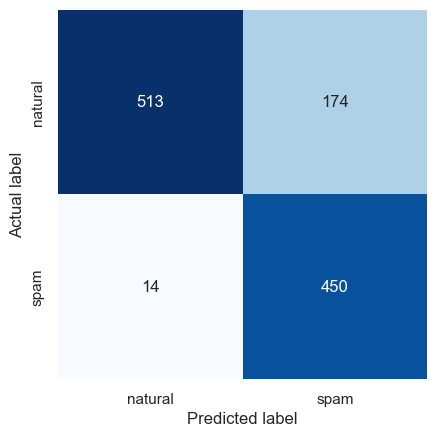

In [339]:
from sklearn.metrics import confusion_matrix
 
y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['natural', 'spam']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

On constate que mon modele a réussi à detecter 422 mail spam parmi 493 vrai spam, ce qui est considérablement performant.

### test du meme model avec une data normalisée

Dans cette partie, je vais tester le meme modèle, mais sur une data normalisée

In [340]:
# normalisation du train set
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()


In [341]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=26))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=5)

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 128)               3456      
                                                                 
 dense_89 (Dense)            (None, 1)                 129       
                                                                 
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
690/690 [==============================] - 1s 1ms/step - loss: 0.2961 - accuracy: 0.8986 - val_loss: 0.2359 - val_accuracy: 0.9253
Epoch 2/30
690/690 [==============================] - 1s 1ms/step - loss: 0.2177 - accuracy: 0.9229 - val_loss: 0.2237 - val_accuracy: 0.9253
Epoch 3/30
690/690 [==============================] - 1s 1ms/step - loss: 0.1933 - accuracy: 0.9275 - val_loss: 0.2164 - val_accuracy: 0.9270
Epoch 4/30
690/690 [=

[]

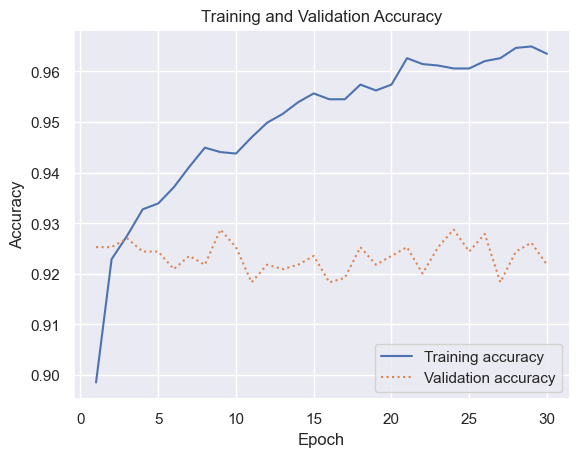

In [342]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

36/36 [==============================] - 0s 657us/step


Text(110.44999999999997, 0.5, 'Actual label')

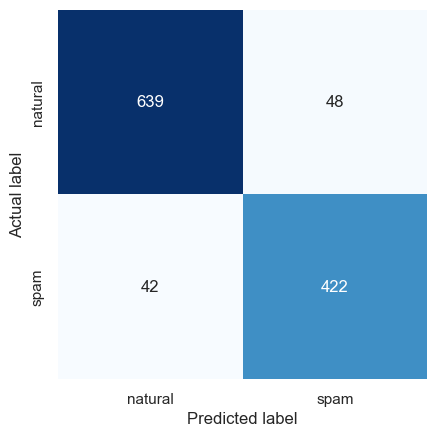

In [343]:
from sklearn.metrics import confusion_matrix
 
y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['natural', 'spam']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

# @@@@@ OZONE_COMPLET TASK  @@@@@

In [344]:
# import librairies
import matplotlib.pyplot as plt
import seaborn as sns

In [345]:
DF = pd.read_csv("ozone_complet.csv", sep = ";" )

etablir la matrice de corrélation pour evaluer la corrélation entre les variables 

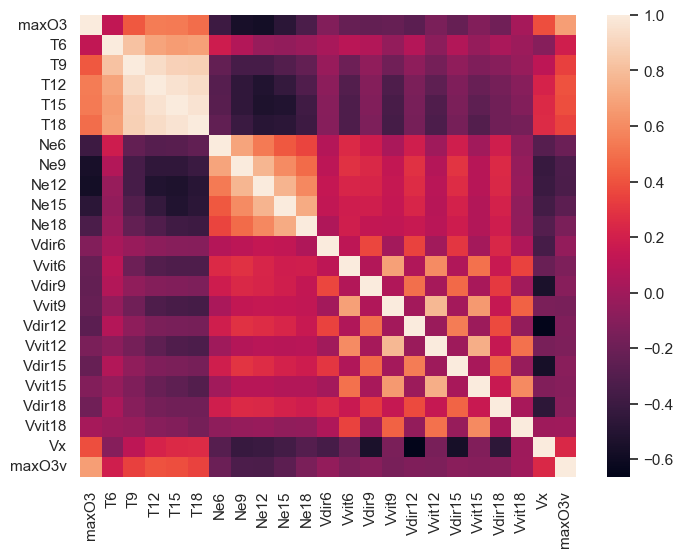

In [346]:
corr_df = DF.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df)
plt.show()


Dans la méme optique que la première partie, j'utilise 

In [347]:
#Correlation Matrix
def new_data_correlation(data, s, target):
    A = data.corr()
    correlation_table = pd.DataFrame(A[target]).reset_index()
    selected_columns = correlation_table[abs(correlation_table[target]) >= s]
    return data[selected_columns["index"].tolist()]

Je commence par testet un table analytique avec les colonnes dans la corrélation dépasse le seuil défini : 15%

In [348]:
ozone = new_data_correlation(DF, 0.15,'maxO3')

In [349]:
ozone.head()

,maxO3,T9,T12,T15,T18,Ne6,Ne9,Ne12,Ne15,Ne18,Vvit6,Vdir9,Vvit9,Vdir12,Vdir15,Vdir18,Vx,maxO3v
19950401,47.6,11.6,13.3,13.6,12.2,8.0,8.0,8.0,8.0,8.0,2.0,290.0,4.0,300.0,340.0,20.0,-3.4641,62.2
19950402,56.2,9.4,13.8,17.4,16.3,8.0,8.0,7.0,0.0,0.0,2.0,160.0,2.0,180.0,110.0,350.0,0.0000,47.6
19950403,61.8,8.0,16.8,21.5,20.2,4.0,5.0,2.0,2.0,3.0,2.0,20.0,2.0,340.0,170.0,170.0,-0.3420,56.2
19950404,50.8,10.5,11.4,12.2,11.4,8.0,7.0,7.0,7.0,8.0,3.0,10.0,4.0,350.0,350.0,350.0,-0.5209,61.8
19950405,59.8,10.8,13.8,14.3,13.3,8.0,7.0,8.0,8.0,7.0,2.0,340.0,2.0,280.0,320.0,350.0,-0.9848,50.8


In [350]:
ozone = ozone.dropna()

In [351]:
ozone.head()

,maxO3,T9,T12,T15,T18,Ne6,Ne9,Ne12,Ne15,Ne18,Vvit6,Vdir9,Vvit9,Vdir12,Vdir15,Vdir18,Vx,maxO3v
19950401,47.6,11.6,13.3,13.6,12.2,8.0,8.0,8.0,8.0,8.0,2.0,290.0,4.0,300.0,340.0,20.0,-3.4641,62.2
19950402,56.2,9.4,13.8,17.4,16.3,8.0,8.0,7.0,0.0,0.0,2.0,160.0,2.0,180.0,110.0,350.0,0.0000,47.6
19950403,61.8,8.0,16.8,21.5,20.2,4.0,5.0,2.0,2.0,3.0,2.0,20.0,2.0,340.0,170.0,170.0,-0.3420,56.2
19950404,50.8,10.5,11.4,12.2,11.4,8.0,7.0,7.0,7.0,8.0,3.0,10.0,4.0,350.0,350.0,350.0,-0.5209,61.8
19950405,59.8,10.8,13.8,14.3,13.3,8.0,7.0,8.0,8.0,7.0,2.0,340.0,2.0,280.0,320.0,350.0,-0.9848,50.8


In [352]:
ozone_train, ozone_test = split(ozone, train_size = 0.75, random_state = 500) 

In [353]:
X_train = ozone_train.drop(['maxO3'], axis = 1)
y_train = ozone_train['maxO3']

X_test = ozone_test.drop(['maxO3'], axis = 1)
y_test = ozone_test['maxO3']

In [354]:
# meanx = X_ozone.mean()
# stdx  = X_ozone.std()
# X_norm = (X_ozone - meanx) / stdx

# meany = y_ozone.mean()
# stdy  = y_ozone.std()
# y_norm = (y_ozone - meany) / stdy

## Approche de machine learning

### regression lasso

In [355]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
parameters = {'alpha': 0.1,
              'tol': 0.1
              }
model = Lasso(**parameters)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
print("R2 {}".format(score))

R2 0.5805461778868638


### regression Ridge:


In [356]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
parameters = {'alpha': 0.1
              }
model = Ridge(**parameters)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
print("R2 {}".format(score))

R2 0.5809165897064508


### regression Elastic-Net:

In [357]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
parameters = {'alpha': 0.1,
              'l1_ratio': 0.1
              }
model = ElasticNet(**parameters)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
print("R2 {}".format(score))

R2 0.5811460927526134


## Approche de Deep Learning

In [358]:
from tensorflow import keras
from keras.callbacks import ModelCheckpoint

Dans cette cellule, j'ecris une fonction qui calcule le score chi2, pour afficher l'erreur sous forme de pourcentage

In [359]:
from keras import backend as K

def coeff_determination(y_true, y_pred):

    SS_res =  K.sum(K.square( y_true-y_pred ))

    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )

    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


Etblissement de l'architecture :

In [360]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [361]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))


# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mae"])  # metrics=[coeff_determination]
NN_model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 128)               2304      
                                                                 
 dense_91 (Dense)            (None, 256)               33024     
                                                                 
 dense_92 (Dense)            (None, 128)               32896     
                                                                 
 dense_93 (Dense)            (None, 1)                 129       
                                                                 
Total params: 68,353
Trainable params: 68,353
Non-trainable params: 0
_________________________________________________________________


In [362]:
checkpoint_name = 'Weights-best_model.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [363]:
NN_model.fit(X_train, y_train, epochs=100, batch_size=20, validation_data = (X_test, y_test ), callbacks = callbacks_list)

Epoch 1/100
40/52 [======================>.......] - ETA: 0s - loss: 2171.4102 - mae: 36.4202 
Epoch 1: val_loss improved from inf to 380.46829, saving model to Weights-best_model.hdf5
52/52 [==============================] - 1s 4ms/step - loss: 1803.8119 - mae: 32.2582 - val_loss: 380.4683 - val_mae: 14.7333
Epoch 2/100
41/52 [======================>.......] - ETA: 0s - loss: 305.1091 - mae: 13.5827
Epoch 2: val_loss improved from 380.46829 to 228.31378, saving model to Weights-best_model.hdf5
52/52 [==============================] - 0s 2ms/step - loss: 294.8819 - mae: 13.4197 - val_loss: 228.3138 - val_mae: 11.9740
Epoch 3/100
43/52 [=======================>......] - ETA: 0s - loss: 272.6137 - mae: 13.1255
Epoch 3: val_loss improved from 228.31378 to 226.70506, saving model to Weights-best_model.hdf5
52/52 [==============================] - 0s 2ms/step - loss: 268.0078 - mae: 13.0210 - val_loss: 226.7051 - val_mae: 11.8890
Epoch 4/100
42/52 [=======================>......] - ETA: 0s 

le code de cette nous permet de visualiser l'accuracy sur le training set et le test set durant l'entrainement de notre modele.


[]

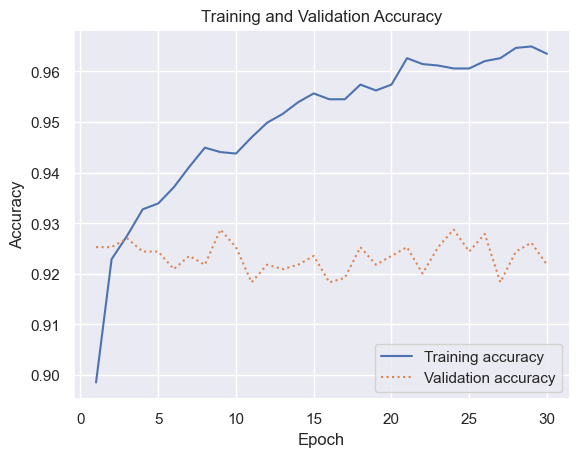

In [364]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

## Approche avec un LSTM

In [365]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

### normalisation

In [366]:
# normalise
# mean = DF.mean()
# std  = DF.std()
# DF = (DF - mean) / std

#split
ozone_train, ozone_test = split(DF, train_size = 0.7, random_state = 10) 

X_train = ozone_train.drop(columns = ["maxO3"], axis = 1) 
X_test = ozone_test.drop(columns = ["maxO3"], axis = 1) 
y_train = ozone_train["maxO3"] 
y_test = ozone_test["maxO3"] 


#convert to numpy
ozone_train = ozone_train.to_numpy()
ozone_test  = ozone_test.to_numpy()

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [367]:
# teste sur la data normalisée : 

# ozone_train = (ozone_train - ozone_train.mean()) / ozone_train.std()
# ozone_test = (ozone_test - ozone_test.mean()) / ozone_test.std()

# X_train = (X_train - X_train.mean()) / X_train.std()
# X_test = (X_test - X_test.mean()) / X_test.std()

# y_train = (y_train - y_train.mean()) / y_train.std()
# y_test = (y_test - y_test.mean()) / y_test.std()

### modélisation

In [368]:
# parametres : 
sequence_len = 7
batch_size = 10
features_len = 23
epochs = 50

# ---- Train generator
train_generator = TimeseriesGenerator(ozone_train, y_train, length=sequence_len,  batch_size = batch_size)
test_generator  = TimeseriesGenerator(ozone_test,  y_test,  length=sequence_len,  batch_size = batch_size)

In [369]:
train_generator[0]

(array([[[ 81.8   ,   4.2   ,  10.5   , ...,   3.    ,   3.4641,
               nan],
         [ 76.8   ,   5.4   ,  11.4   , ...,   9.    ,   6.8937,
           62.2   ],
         [111.4   ,  12.9   ,  21.6   , ...,   4.    ,   3.9392,
           84.2   ],
         ...,
         [ 75.    ,  16.2   ,  16.6   , ...,   5.    ,  -6.0622,
           75.2   ],
         [ 82.    ,  13.    ,  17.    , ...,   5.    ,  -3.0642,
           95.    ],
         [108.    ,  20.7   ,  24.    , ...,   5.    ,  -3.8567,
          146.    ]],
 
        [[ 76.8   ,   5.4   ,  11.4   , ...,   9.    ,   6.8937,
           62.2   ],
         [111.4   ,  12.9   ,  21.6   , ...,   4.    ,   3.9392,
           84.2   ],
         [ 60.6   ,  10.2   ,  15.9   , ...,   6.    ,   1.0419,
           81.2   ],
         ...,
         [ 82.    ,  13.    ,  17.    , ...,   5.    ,  -3.0642,
           95.    ],
         [108.    ,  20.7   ,  24.    , ...,   5.    ,  -3.8567,
          146.    ],
         [ 94.8   ,  14

In [370]:
x,y=train_generator[0]
print(f'Nombre de train batchs disponibles : ', len(train_generator))
print('batch x shape : ',x.shape)
print('batch y shape : ',y.shape)

Nombre de train batchs disponibles :  102
batch x shape :  (10, 7, 23)
batch y shape :  (10,)


### model : 

In [371]:
# pour visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 7, 100)            2400      
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_95 (Dense)            (None, 100)               10100     
                                                                 
 dense_96 (Dense)            (None, 1)                 101       
                                                                 
Total params: 93,001
Trainable params: 93,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
102/102 [==============================] - 2s 7ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 2/50
102/102 [==============================] - 0s

[]

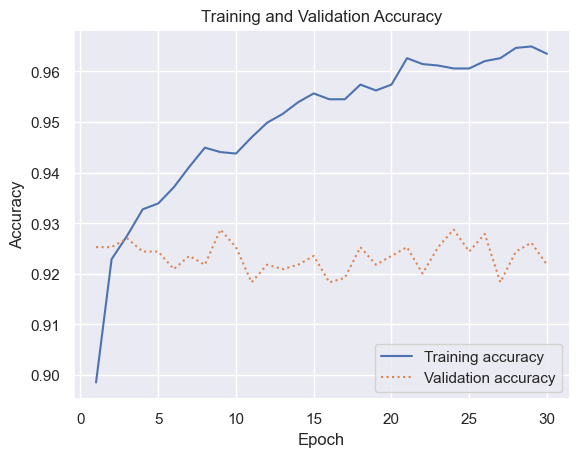

In [372]:
model = keras.models.Sequential()
model.add( keras.layers.InputLayer(input_shape=(sequence_len, ozone_train.shape[1])) )
model.add( keras.layers.Dense(100, activation='relu') )

model.add( keras.layers.LSTM(100, activation='relu') )
#model.add( keras.layers.Dropout(0.2) )
model.add( keras.layers.Dense(100, activation='relu') )
model.add( keras.layers.Dense(1) )

print(model.summary())

#callback
save_dir = 'best_model.h5'
bestmodel_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_dir,  save_best_only=True)

# compile 
model.compile(optimizer='adam', 
              loss='mse', 
              metrics   = ["mse"] )

#fit
history = model.fit(train_generator, epochs = 50, validation_data = test_generator, callbacks = [bestmodel_callback])


# plot the loss 
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper right')
# plt.show()


 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

## test d'un RNN simple

In [378]:
from keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(units=16, input_shape=(sequence_len, ozone_train.shape[1]), use_bias=False))
model.add( keras.layers.Dense(1) )

print(model.summary())

#callback
save_dir = 'best_model.h5'
bestmodel_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_dir,  save_best_only=True)

# compile 
model.compile(optimizer='adam', 
              loss='mse', 
              metrics   = ["mse"] )

#fit
history = model.fit(train_generator, epochs = 100, validation_data = test_generator, callbacks = bestmodel_callback)


# plot the loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 16)                624       
                                                                 
 dense_102 (Dense)           (None, 1)                 17        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
102/102 [==============================] - 1s 4ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 2/500
102/102 [==============================] - 0s 2ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 3/500
102/102 [==============================] - 0s 2ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 4/500
102/102 [==============================] - 0s 2ms/step - loss: nan - ms

KeyboardInterrupt: 

### Mon RNN ne converge pas !!

# Merci pour votre lecture ! 😀